# Importaciones y Archivos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
path_estados = 'estados.parquet'
path_restaurantes = 'restaurantes.parquet'
path_reseñas = 'reviews.parquet'

# Estados

## Describir el DataFrame

In [3]:
df = pd.read_parquet(path_estados)

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Abbreviation  50 non-null     object
 1   State               50 non-null     object
 2   Population          50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


,State Abbreviation,State,Population
0,AL,Alabama,5024279
1,AK,Alaska,733391
2,AZ,Arizona,7151502
3,AR,Arkansas,3011524
4,CA,California,39538223


### Comprobar la Existencia de Valores Nulos

In [5]:
print(df.isnull().sum())

State Abbreviation    0
State                 0
Population            0
dtype: int64


### Estadísticas descriptivas

In [6]:
print(df.describe())

         Population
count  5.000000e+01
mean   6.615296e+06
std    7.435818e+06
min    5.768510e+05
25%    1.869706e+06
50%    4.581796e+06
75%    7.566836e+06
max    3.953822e+07


### Estadísticas descriptivas para columnas categòricas

In [7]:
print(df.describe(include=['object']))

       State Abbreviation    State
count                  50       50
unique                 50       50
top                    AL  Alabama
freq                    1        1


## Visualización de los Datos

### Histograma de la población

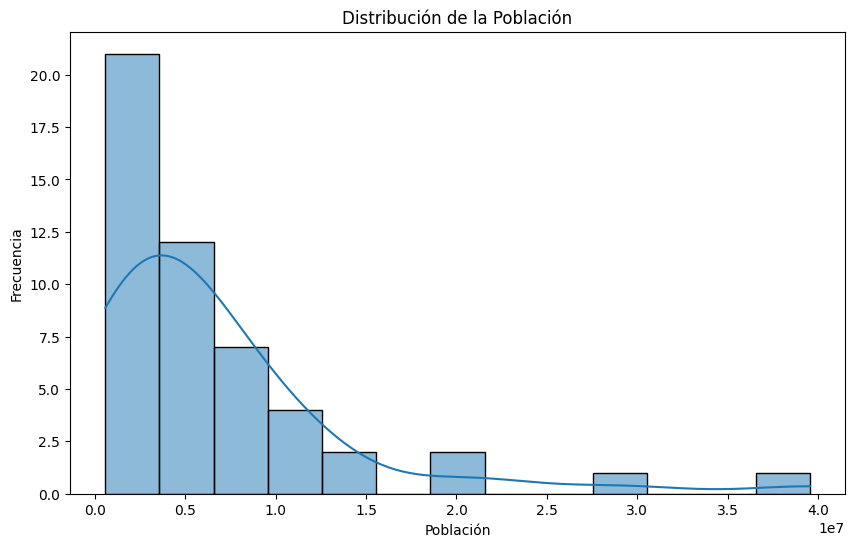

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Population'], kde=True)
plt.title('Distribución de la Población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

### Gráfico de barras de la población por estado

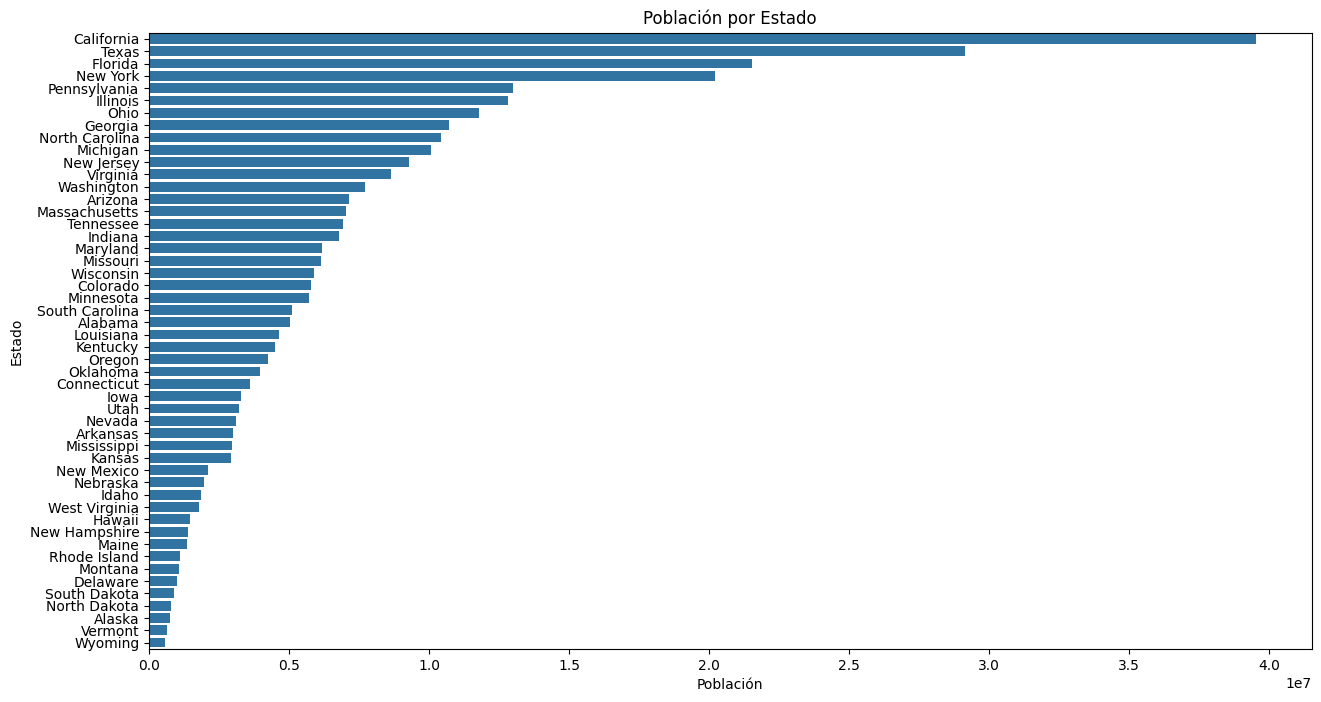

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Population', y='State', data=df.sort_values('Population', ascending=False))
plt.title('Población por Estado')
plt.xlabel('Población')
plt.ylabel('Estado')
plt.show()

# Restaurantes

## Describir el DataFrame

In [10]:
df = pd.read_parquet(path_restaurantes)

In [11]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 934552 entries, 3 to 212013
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nombre            934552 non-null  object 
 1   id_restaurante    934552 non-null  object 
 2   categorias        934552 non-null  object 
 3   cantidad_resenas  934552 non-null  int64  
 4   latitud           934552 non-null  float64
 5   longitud          934552 non-null  float64
 6   atributos         927912 non-null  object 
 7   calificacion      934552 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 64.2+ MB
None


,nombre,id_restaurante,categorias,cantidad_resenas,latitud,longitud,atributos,calificacion
3,St Honore Pastries,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80,39.955505,-75.155564,"{'AcceptsInsurance': None, 'Accessibility': No...",4.0
14,Zio's Italian Market,0bPLkL0QhhPO5kt1_EXmNQ,"Food, Delis, Italian, Bakeries, Restaurants",100,27.916116,-82.760461,"{'AcceptsInsurance': None, 'Accessibility': No...",4.5
22,Hibachi Express,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants",20,39.904320,-86.053080,"{'AcceptsInsurance': None, 'Accessibility': No...",4.0
28,Bar One,QdN72BWoyFypdGJhhI5r7g,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",65,39.939825,-75.157447,"{'AcceptsInsurance': None, 'Accessibility': No...",4.0
29,Domino's Pizza,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants",8,36.464747,-86.659187,"{'AcceptsInsurance': None, 'Accessibility': No...",3.5


### Comprobar la Existencia de Valores Nulos

In [12]:
print(df.isnull().sum())

nombre                 0
id_restaurante         0
categorias             0
cantidad_resenas       0
latitud                0
longitud               0
atributos           6640
calificacion           0
dtype: int64


### Porcentaje de Valores Nulos

In [13]:
# Calcular el porcentaje de valores nulos por columna
nulos_porcentaje = df.isnull().mean() * 100
print(nulos_porcentaje)

del nulos_porcentaje

nombre              0.000000
id_restaurante      0.000000
categorias          0.000000
cantidad_resenas    0.000000
latitud             0.000000
longitud            0.000000
atributos           0.710501
calificacion        0.000000
dtype: float64


### Estadísticas Descriptivas

In [14]:
# Estadísticas descriptivas para columnas numéricas
print(df.describe())

       cantidad_resenas        latitud       longitud   calificacion
count     934552.000000  934552.000000  934552.000000  934552.000000
mean         110.302395      37.309314     -91.675418       4.094977
std          288.579288       5.435041      17.036195       0.632714
min            1.000000      19.060045    -177.378634       1.000000
25%           17.000000      33.723083     -98.570330       3.800000
50%           38.000000      38.593164     -86.692606       4.200000
75%           96.000000      40.844044     -77.717196       4.500000
max         9998.000000      71.292018     180.000000       5.000000


### Estadísticas Descriptivas para Columnas Categóricas

#### Definiciòn de funciones para el analisis de las columnas categóricas

In [15]:

def analizar_nombre(df, columna):
    # Calcular la cantidad total de entradas
    total = len(df)
    
    # Calcular la cantidad de entradas únicas
    unicos = df[columna].nunique()
    
    # Contar la frecuencia de cada entrada
    conteo = df[columna].value_counts()
    
    # Obtener las tres entradas más comunes y su frecuencia
    top3 = conteo.head(3)
    
    return {
        "Cantidad Total de Restaurantes": total,
        "Cantidad de Restaurantes Únicos": unicos,
        "Top 3 Restaurantes Más Comunes": top3.to_dict()
    }

In [16]:

def analizar_categorias(df, columna_categorias):
    # Convertir la columna de categorías a una lista de listas
    categorias_lista = df[columna_categorias].apply(lambda x: x.split(', ')).tolist()
    
    # Crear una lista plana de todas las categorías
    todas_categorias = [categoria for sublist in categorias_lista for categoria in sublist]
    
    # Calcular la cantidad total de categorías
    cantidad_total = len(todas_categorias)
    
    # Calcular la cantidad de categorías únicas
    categorias_unicas = pd.Series(todas_categorias).nunique()
    
    # Contar la frecuencia de cada categoría
    conteo_categorias = pd.Series(todas_categorias).value_counts()
    
    # Obtener las tres categorías más repetidas y su frecuencia
    top3_categorias = conteo_categorias.head(3)
    
    return {
        "Cantidad Total de Categorías": cantidad_total,
        "Cantidad de Categorías Únicas": categorias_unicas,
        "Top 3 Categorías Más Repetidas": top3_categorias.to_dict()
    }

#### Llamado a las funciones

In [17]:
analizar_nombre(df, 'nombre')

{'Cantidad Total de Restaurantes': 934552,
 'Cantidad de Restaurantes Únicos': 160184,
 'Top 3 Restaurantes Más Comunes': {'Subway': 36740,
  "Domino's Pizza": 7660,
  "Dunkin'": 6988}}

In [18]:
analizar_categorias(df, 'categorias')

{'Cantidad Total de Categorías': 2620916,
 'Cantidad de Categorías Únicas': 2409,
 'Top 3 Categorías Más Repetidas': {'Restaurant': 386952,
  'Fast food restaurant': 114744,
  'Takeout Restaurant': 95332}}

## Visualización de los Datos

### Histograma de la Calificación

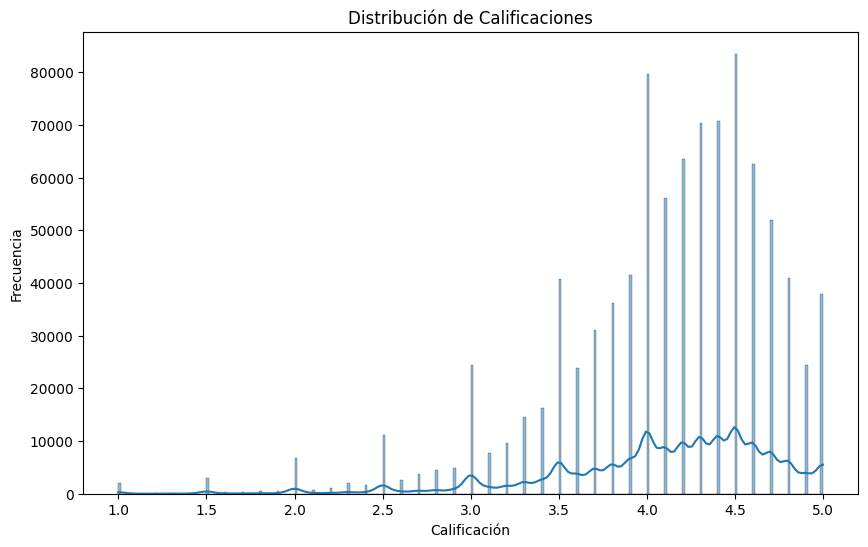

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calificacion'], kde=True)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

### Gráfico de Barras de la Cantidad de Reseñas

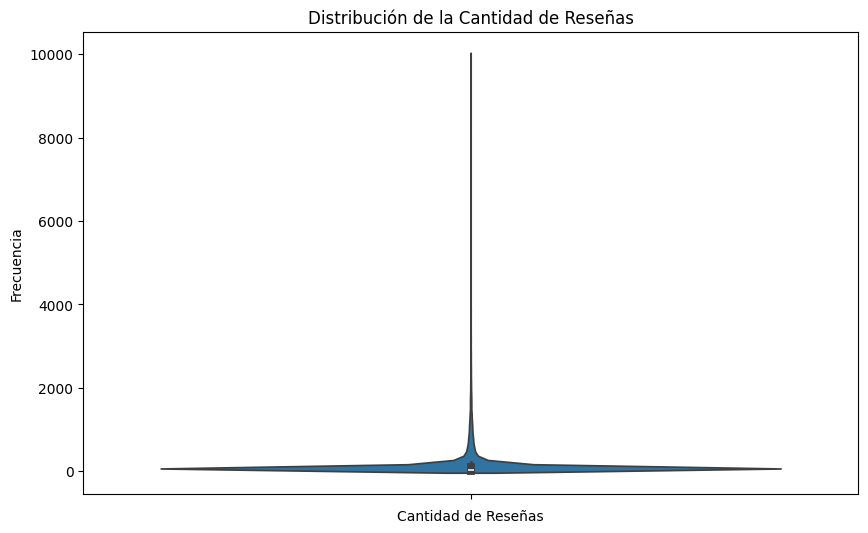

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(df['cantidad_resenas'])
plt.title('Distribución de la Cantidad de Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

### Mapa de Calor de Correlaciones

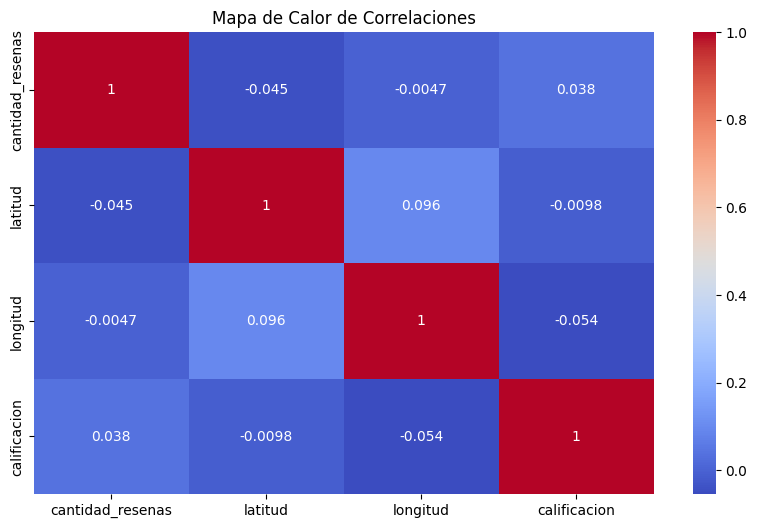

In [21]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

del numeric_df

### Distribución Geográfica de los Restaurantes

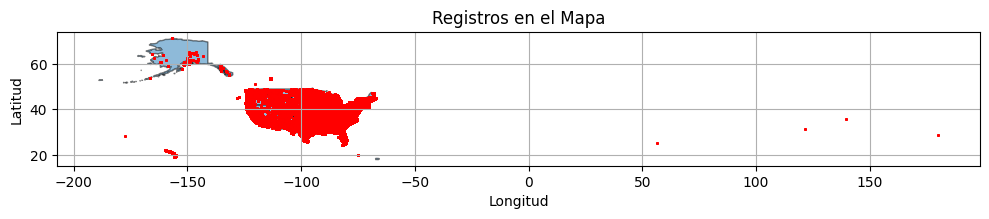

In [22]:
# Cargar los datos geoespaciales del mapa GeoJSON
usa_geojson = 'Geojson/us-states.json'
usa_gpd = gpd.read_file(usa_geojson)

# Crear un GeoDataFrame con los registros de tus datos
registros_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitud'], df['latitud']))

# Crear el subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotear los barrios en el mapa
usa_gpd.plot(ax=ax, edgecolor='black', alpha=0.5)

# Plotear los registros en el mapa
registros_gdf.plot(ax=ax, color='red', markersize=1)

# Ajustar diseño
plt.title('Registros en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar líneas de división en los ejes x e y
ax.grid(True)

plt.tight_layout()

# Mostrar el mapa
plt.show()

del usa_geojson
del usa_gpd
del registros_gdf

### Gráfico de Barras de los Restaurantes Más Presentes

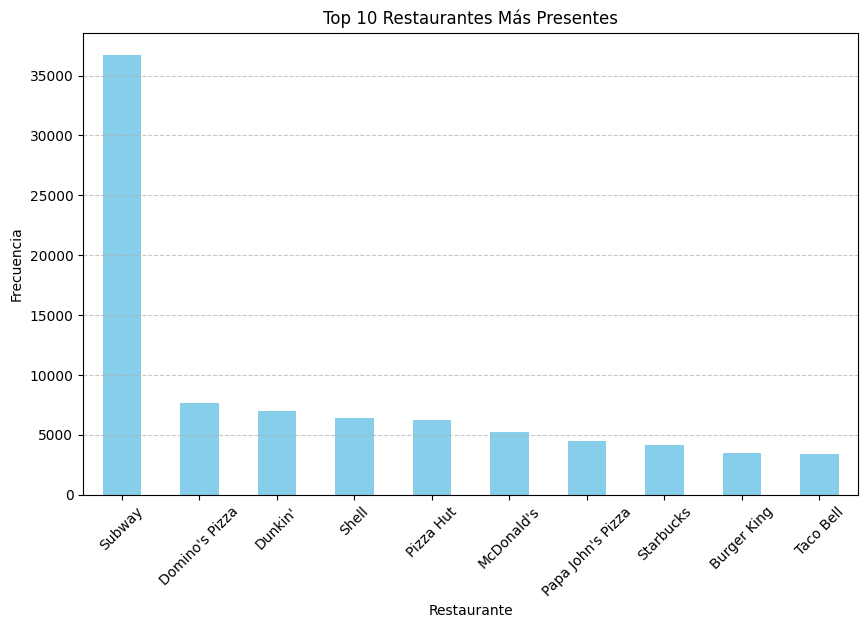

In [23]:
frecuencia_restaurantes = df['nombre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
frecuencia_restaurantes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurantes Más Presentes')
plt.xlabel('Restaurante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

del frecuencia_restaurantes

### Gráfico de Barras de las Frecuencia de las categorías

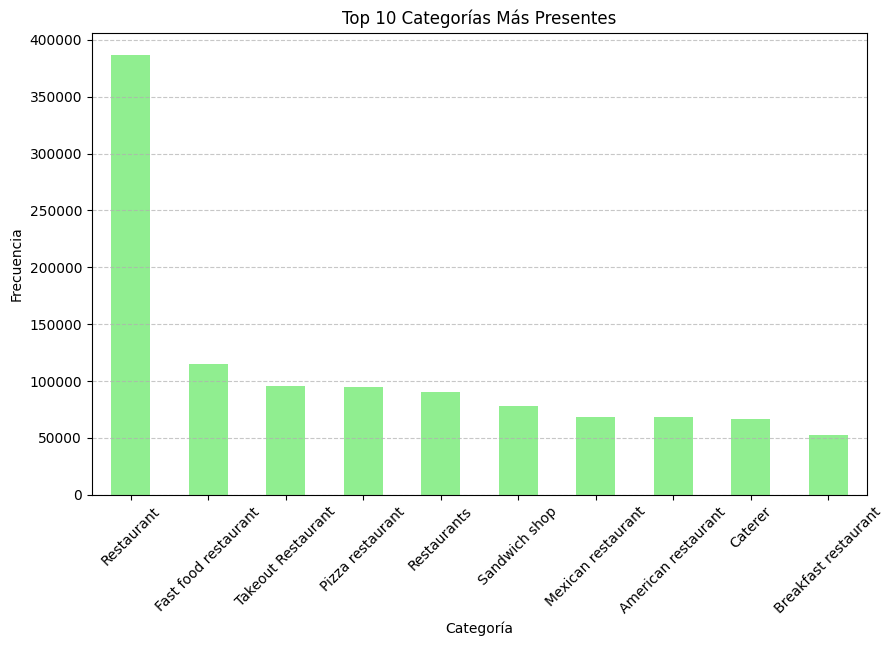

In [24]:
# Primero, desanidaremos la columna de categorías
categorias_desanidadas = df['categorias'].str.split(', ').explode()

# Contar la frecuencia de las categorías
frecuencia_categorias = categorias_desanidadas.value_counts().head(10)

plt.figure(figsize=(10, 6))
frecuencia_categorias.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categorías Más Presentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

del categorias_desanidadas
del frecuencia_categorias

# Reseñas

## Describir el DataFrame

In [26]:
df = pd.read_parquet(path_reseñas)

In [27]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9747671 entries, 0 to 2393451
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id_usuario              object 
 1   id_restaurante          object 
 2   id_resena               object 
 3   calificacion            float64
 4   anio                    int32  
 5   puntaje_de_sentimiento  float64
 6   user_id                 object 
 7   gmap_id                 object 
 8   review_id               object 
 9   rating                  float64
 10  sentiment_score         float64
dtypes: float64(4), int32(1), object(6)
memory usage: 855.2+ MB
None


,id_usuario,id_restaurante,id_resena,calificacion,anio,puntaje_de_sentimiento,user_id,gmap_id,review_id,rating,sentiment_score
0,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Sx8TMOWLNuJBWer-0pcmoA,4.0,2017,0.0,None,None,None,NaN,NaN
0,None,None,None,NaN,2019,NaN,117440349723823658676,0x80c2c778e3b73d33:0xbdc58662a4a97d49,0x80c2c7781174403497,5.0,0.0
2,None,None,None,NaN,2017,NaN,100580770836123539210,0x80c2c778e3b73d33:0xbdc58662a4a97d49,0x80c2c7781005807708,5.0,0.0
4,None,None,None,NaN,2019,NaN,100185732664454906803,0x80c2c778e3b73d33:0xbdc58662a4a97d49,0x80c2c7781001857326,5.0,0.0
6,None,None,None,NaN,2018,NaN,117429873567288636857,0x80c2c778e3b73d33:0xbdc58662a4a97d49,0x80c2c7781174298735,5.0,0.0


### Comprobar la Existencia de Valores Nulos

In [28]:
print(df.isnull().sum())

id_usuario                6795561
id_restaurante            6795561
id_resena                 6795561
calificacion              6795561
anio                            0
puntaje_de_sentimiento    6795561
user_id                   2952110
gmap_id                   2952110
review_id                 2952110
rating                    2952110
sentiment_score           2952110
dtype: int64


### Estadísticas descriptivas

In [ ]:
print(df.describe())

         Population
count  5.000000e+01
mean   6.615296e+06
std    7.435818e+06
min    5.768510e+05
25%    1.869706e+06
50%    4.581796e+06
75%    7.566836e+06
max    3.953822e+07


### Estadísticas descriptivas para columnas categòricas

In [ ]:
print(df.describe(include=['object']))

       State Abbreviation    State
count                  50       50
unique                 50       50
top                    AL  Alabama
freq                    1        1


## Visualización de los Datos

### Histograma de la Calificación

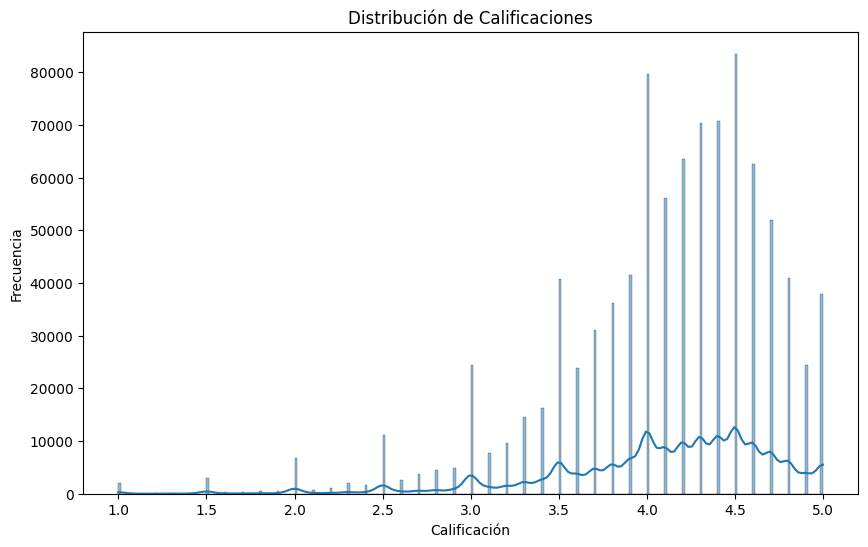

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calificacion'], kde=True)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

### Histograma del Puntaje del Analisis de Sentimientos

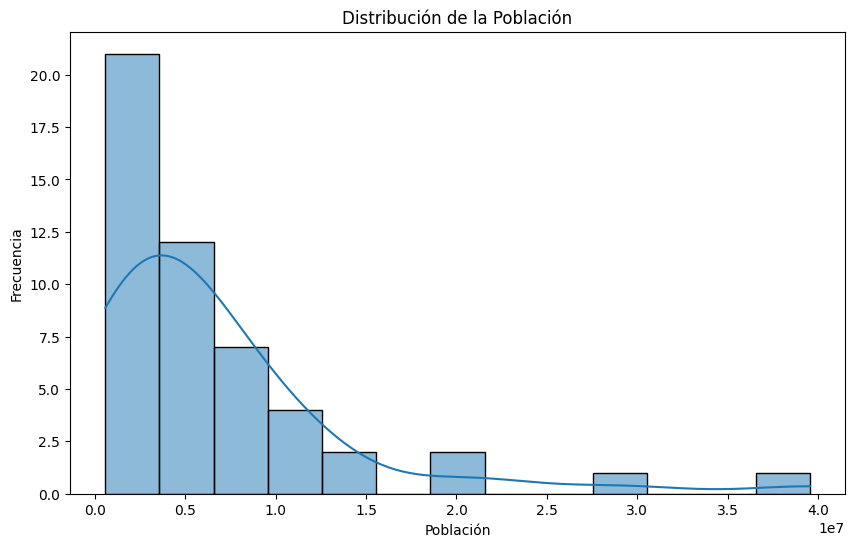

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['puntaje_de_sentimientos'], kde=True)
plt.title('Distribución del Puntaje del Analisis de Sentimientos')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

### Mapa de Calor de Correlaciones

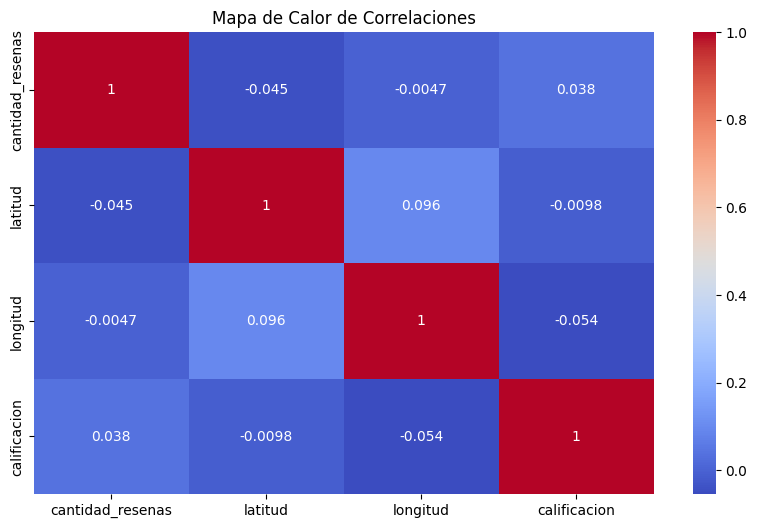

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

del numeric_df

### Gráfico de Barras de La Frecuencia de Reseñas a los largo de los Años

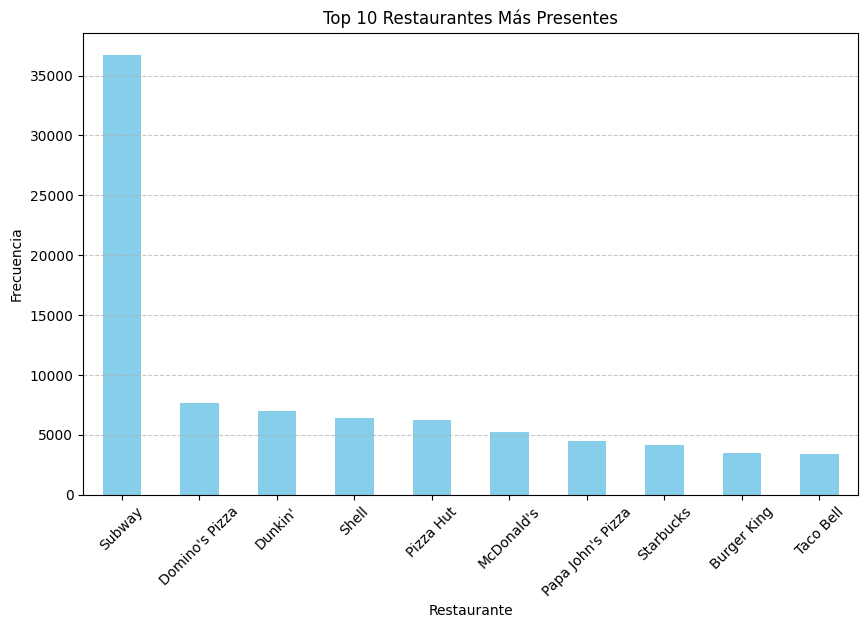

In [ ]:
frecuencia_anios = df['anio'].value_counts()

plt.figure(figsize=(10, 6))
frecuencia_anios.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Reseñas a los largo de los Años')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

del frecuencia_anios